In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
df = pd.read_csv("C:\Desktop\MAS\DATASET\MAS-ACA-Masterclass-main\MAS-ACA-Masterclass-main\CSV Files\IPL_ball_by_ball_updated.csv")

In [4]:
df.innings.unique()

array([2, 1, 4, 3, 6, 5], dtype=int64)

In [5]:
df = df[(df.innings == 1) | (df.innings == 2)]

In [6]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['total_runs'] = df.apply(lambda x: x['runs_off_bat'] + x['extras'], axis=1)
df['is_out'] = df['player_dismissed'].apply(lambda x: 1 if type(x) == str else 0)

In [8]:
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,is_out
225948,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",1,13.6,Rajasthan Royals,Gujarat Titans,SO Hetmyer,R Ashwin,Rashid Khan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
225949,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",1,14.1,Rajasthan Royals,Gujarat Titans,SO Hetmyer,R Ashwin,HH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
225950,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",1,14.2,Rajasthan Royals,Gujarat Titans,R Ashwin,SO Hetmyer,HH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
225951,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",1,12.2,Rajasthan Royals,Gujarat Titans,R Ashwin,SO Hetmyer,HH Pandya,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
225952,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,18.1,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,OC McCoy,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0


In [9]:
df.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [10]:
df[df.batting_team == 'Gujarat Titans'].total_runs.value_counts()

1    883
0    622
4    253
2    124
6    79 
5    8  
3    2  
Name: total_runs, dtype: int64

In [11]:
df[df.batting_team == 'Chennai Super Kings'].total_runs.value_counts()

1    10515
0    8661 
4    2829 
2    1706 
6    1259 
3    98   
5    46   
7    9    
Name: total_runs, dtype: int64

In [12]:
# t1 = bat first, t1 = bat second
t1 = 'Chennai Super Kings'
t2 = 'Gujarat Titans'

In [13]:
df[(df.batting_team == t1) & (df.bowling_team == t2) & (df.innings == 1)].match_id.unique()

array([1304075, 1304108], dtype=int64)

In [14]:
req_matchid = 1304108

In [15]:
rdf = df[(df.match_id == req_matchid)]

In [16]:
rdf1 = rdf[rdf.innings == 1]
rdf2 = rdf[rdf.innings == 2]

In [17]:
rdf1 = rdf1.sort_values('ball', ascending = True)
rdf2 = rdf2.sort_values('ball', ascending = True)

In [18]:
rdf1.reset_index(inplace = True, drop = True)
rdf2.reset_index(inplace = True, drop = True)

In [19]:
rdf2.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,is_out
114,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",2,18.3,Gujarat Titans,Chennai Super Kings,DA Miller,WP Saha,Mukesh Choudhary,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
115,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",2,18.4,Gujarat Titans,Chennai Super Kings,WP Saha,DA Miller,Mukesh Choudhary,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
116,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",2,18.5,Gujarat Titans,Chennai Super Kings,DA Miller,WP Saha,Mukesh Choudhary,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
117,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",2,18.6,Gujarat Titans,Chennai Super Kings,WP Saha,DA Miller,Mukesh Choudhary,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
118,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",2,19.1,Gujarat Titans,Chennai Super Kings,WP Saha,DA Miller,M Pathirana,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0


In [20]:
t1_outs = df[df.batting_team == t1].is_out.sum()
t2_outs = df[df.batting_team == t2].is_out.sum()

In [21]:
t1_outcome_counts = df[df.batting_team == t1].total_runs.value_counts()
t2_outcome_counts = df[df.batting_team == t2].total_runs.value_counts()

In [22]:
t1_outs, t2_outs

(1087, 82)

In [23]:
t1_outcome_counts, t2_outcome_counts

(1    10515
 0    8661 
 4    2829 
 2    1706 
 6    1259 
 3    98   
 5    46   
 7    9    
 Name: total_runs, dtype: int64,
 1    883
 0    622
 4    253
 2    124
 6    79 
 5    8  
 3    2  
 Name: total_runs, dtype: int64)

In [24]:
outcomes = [0, 1, 2, 3, 4, 6, 'w']

In [25]:
t1_outcomes = []
t2_outcomes = []

for outcome in outcomes:
    if outcome != 'w':
        t1_outcomes.append(t1_outcome_counts[outcome])
        t2_outcomes.append(t2_outcome_counts[outcome])
    else:
        t1_outcomes.append(t1_outs)
        t2_outcomes.append(t2_outs)


In [26]:
t1_outcomes, t2_outcomes

([8661, 10515, 1706, 98, 2829, 1259, 1087], [622, 883, 124, 2, 253, 79, 82])

In [27]:
t1_pb_outcome = [i/sum(t1_outcomes) for i in t1_outcomes]
t2_pb_outcome = [i/sum(t2_outcomes) for i in t2_outcomes]

In [28]:
t1_pb_outcome, t2_pb_outcome

([0.33114127317912445,
  0.4020263811890652,
  0.06522653412349455,
  0.0037468935194035556,
  0.10816287516727204,
  0.04813611164213343,
  0.041559931179506786],
 [0.3041564792176039,
  0.4317848410757946,
  0.06063569682151589,
  0.0009779951100244498,
  0.12371638141809291,
  0.03863080684596577,
  0.040097799511002445])

In [29]:
t1_pb_ls = np.cumsum(t1_pb_outcome)
t2_pb_ls = np.cumsum(t2_pb_outcome)

In [30]:
t1_pb_ls, t2_pb_ls

(array([0.33114127, 0.73316765, 0.79839419, 0.80214108, 0.91030396,
        0.95844007, 1.        ]),
 array([0.30415648, 0.73594132, 0.79657702, 0.79755501, 0.92127139,
        0.9599022 , 1.        ]))

In [31]:
np.random.random()

0.8693365701624202

In [32]:
pred_runs = 0
pred_wks = 0
balls = 120

i1p_0 = t1_pb_ls[0]
i1p_1 = t1_pb_ls[1]
i1p_2 = t1_pb_ls[2]
i1p_3 = t1_pb_ls[3]
i1p_4 = t1_pb_ls[4]
i1p_6 = t1_pb_ls[5]
i1p_w = t1_pb_ls[6]

i2p_0 = t2_pb_ls[0]
i2p_1 = t2_pb_ls[1]
i2p_2 = t2_pb_ls[2]
i2p_3 = t2_pb_ls[3]
i2p_4 = t2_pb_ls[4]
i2p_6 = t2_pb_ls[5]
i2p_w = t2_pb_ls[6]


for i in range(balls):
    r_values = np.random.random()
    
    if r_values <= i1p_0:
        pred_runs += 0
    elif r_values <= i1p_1:
        pred_runs += 1
    elif r_values <= i1p_2:
        pred_runs += 2
    elif r_values <= i1p_3:
        pred_runs += 3
    elif r_values <= i1p_4:
        pred_runs += 4
    elif r_values <= i1p_6:
        pred_runs += 6
    else:
        pred_runs += 0
        pred_wks += 1
        
        if pred_wks == 10:
            break

In [33]:
pred_runs, pred_wks

(153, 5)

In [34]:
rdf.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,is_out
223024,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",1,17.6,Chennai Super Kings,Gujarat Titans,MS Dhoni,N Jagadeesan,Rashid Khan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
223026,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",1,14.3,Chennai Super Kings,Gujarat Titans,N Jagadeesan,RD Gaikwad,R Sai Kishore,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
223027,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",1,14.2,Chennai Super Kings,Gujarat Titans,N Jagadeesan,RD Gaikwad,R Sai Kishore,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
223028,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",1,14.1,Chennai Super Kings,Gujarat Titans,RD Gaikwad,N Jagadeesan,R Sai Kishore,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
223029,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",1,13.6,Chennai Super Kings,Gujarat Titans,RD Gaikwad,N Jagadeesan,Mohammed Shami,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [35]:
def innings1_runs_pred(curr_score, curr_wks, curr_overs):
    
    pred_runs = curr_score
    pred_wks = curr_wks
    over_ball = curr_overs
    
    over_no = int(str(over_ball).split('.')[0])
    ball_no = int(str(over_ball).split('.')[1])
    leftover_balls = 120 - (over_no*6 + ball_no)
    
    
    
    i1p_0 = t1_pb_ls[0]
    i1p_1 = t1_pb_ls[1]
    i1p_2 = t1_pb_ls[2]
    i1p_3 = t1_pb_ls[3]
    i1p_4 = t1_pb_ls[4]
    i1p_6 = t1_pb_ls[5]
    i1p_w = t1_pb_ls[6]


    for i in range(leftover_balls):
        r_values = np.random.random()

        if r_values <= i1p_0:
            pred_runs += 0
        elif r_values <= i1p_1:
            pred_runs += 1
        elif r_values <= i1p_2:
            pred_runs += 2
        elif r_values <= i1p_3:
            pred_runs += 3
        elif r_values <= i1p_4:
            pred_runs += 4
        elif r_values <= i1p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1

            if pred_wks == 10:
                break

    return pred_runs

In [36]:
innings1_runs_pred(150, 5, 15.4)

178

In [37]:
def innings2_runs_pred(curr_score, curr_wks, curr_overs, target):
    
    pred_runs = curr_score
    pred_wks = curr_wks
    over_ball = curr_overs
    
    over_no = int(str(over_ball).split('.')[0])
    ball_no = int(str(over_ball).split('.')[1])
    leftover_balls = 120 - (over_no*6 + ball_no)
    
    
    
    i2p_0 = t2_pb_ls[0]
    i2p_1 = t2_pb_ls[1]
    i2p_2 = t2_pb_ls[2]
    i2p_3 = t2_pb_ls[3]
    i2p_4 = t2_pb_ls[4]
    i2p_6 = t2_pb_ls[5]
    i2p_w = t2_pb_ls[6]


    for i in range(leftover_balls):
        r_values = np.random.random()

        if r_values <= i2p_0:
            pred_runs += 0
        elif r_values <= i2p_1:
            pred_runs += 1
        elif r_values <= i2p_2:
            pred_runs += 2
        elif r_values <= i2p_3:
            pred_runs += 3
        elif r_values <= i2p_4:
            pred_runs += 4
        elif r_values <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1

            if pred_wks == 10:
                break
        if pred_runs > target:
            break

    return pred_runs

In [38]:
innings2_runs_pred(100, 7, 10.2, 170)

175

In [59]:
rdf2.head(62)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,is_out
0,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",2,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,Mukesh Choudhary,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",2,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,Mukesh Choudhary,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
2,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",2,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,Mukesh Choudhary,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",2,0.4,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,Mukesh Choudhary,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
4,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",2,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,Mukesh Choudhary,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
5,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",2,0.6,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,Mukesh Choudhary,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
6,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",2,1.1,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,Simarjeet Singh,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
7,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",2,1.2,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,Simarjeet Singh,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
8,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",2,1.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,Simarjeet Singh,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
9,1304108,2022,2022-05-15,"Wankhede Stadium, Mumbai",2,1.4,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,Simarjeet Singh,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [40]:
curr_score = 0
curr_wks = 0
curr_overs = 0.0

ing1_pred = []

for i in range(len(rdf1)):
    curr_score += rdf1.total_runs[i]
    curr_wks += rdf1.is_out[i]
    curr_overs = rdf1.ball[i]
    
    prediction1 = innings1_runs_pred(curr_score, curr_wks, curr_overs)
    ing1_pred.append(prediction1)

In [41]:
ing1_pred

[163,
 142,
 170,
 152,
 126,
 136,
 125,
 164,
 140,
 147,
 155,
 156,
 157,
 153,
 108,
 126,
 144,
 165,
 114,
 163,
 151,
 137,
 130,
 137,
 151,
 165,
 136,
 137,
 166,
 134,
 157,
 147,
 173,
 151,
 135,
 160,
 144,
 139,
 151,
 166,
 155,
 168,
 161,
 173,
 159,
 158,
 124,
 148,
 156,
 126,
 145,
 140,
 142,
 161,
 149,
 154,
 127,
 164,
 166,
 148,
 159,
 147,
 136,
 146,
 147,
 152,
 145,
 149,
 160,
 141,
 135,
 138,
 149,
 157,
 140,
 147,
 148,
 153,
 138,
 136,
 138,
 140,
 139,
 140,
 145,
 143,
 153,
 151,
 128,
 136,
 146,
 148,
 143,
 133,
 129,
 146,
 144,
 157,
 156,
 138,
 139,
 140,
 131,
 137,
 129,
 134,
 137,
 134,
 131,
 138,
 129,
 140,
 127,
 132,
 139,
 131,
 136,
 128,
 128,
 144,
 135,
 132,
 132,
 132,
 133]

In [42]:
curr_score = 0
curr_wks = 0
curr_overs = 0.0
target = rdf1.total_runs.sum()

ing2_pred = []

for i in range(len(rdf2)):
    curr_score += rdf2.total_runs[i]
    curr_wks += rdf2.is_out[i]
    curr_overs = rdf2.ball[i]
    
    prediction2 = innings2_runs_pred(curr_score, curr_wks, curr_overs, target)
    ing2_pred.append(prediction2)
    

In [43]:
ing2_pred


[136,
 134,
 135,
 135,
 135,
 137,
 134,
 135,
 136,
 131,
 138,
 134,
 138,
 134,
 134,
 135,
 134,
 135,
 135,
 135,
 125,
 135,
 137,
 134,
 135,
 136,
 138,
 137,
 136,
 136,
 137,
 137,
 134,
 134,
 134,
 136,
 128,
 134,
 137,
 139,
 135,
 134,
 137,
 137,
 134,
 134,
 134,
 137,
 134,
 135,
 134,
 135,
 135,
 134,
 134,
 135,
 136,
 136,
 138,
 135,
 134,
 137,
 135,
 134,
 134,
 134,
 135,
 134,
 134,
 135,
 137,
 135,
 134,
 136,
 137,
 137,
 134,
 135,
 134,
 135,
 135,
 135,
 134,
 136,
 134,
 135,
 137,
 135,
 134,
 137,
 134,
 135,
 134,
 134,
 134,
 134,
 136,
 139,
 137,
 134,
 135,
 131,
 134,
 137,
 134,
 134,
 134,
 134,
 134,
 137,
 135,
 134,
 134,
 134,
 134,
 135,
 134,
 139,
 138]

In [44]:
actual_score1 = rdf1.total_runs.sum()
actual_score2 = rdf2.total_runs.sum()

In [45]:
actual_score1

133

Text(0, 0.5, 'Runs')

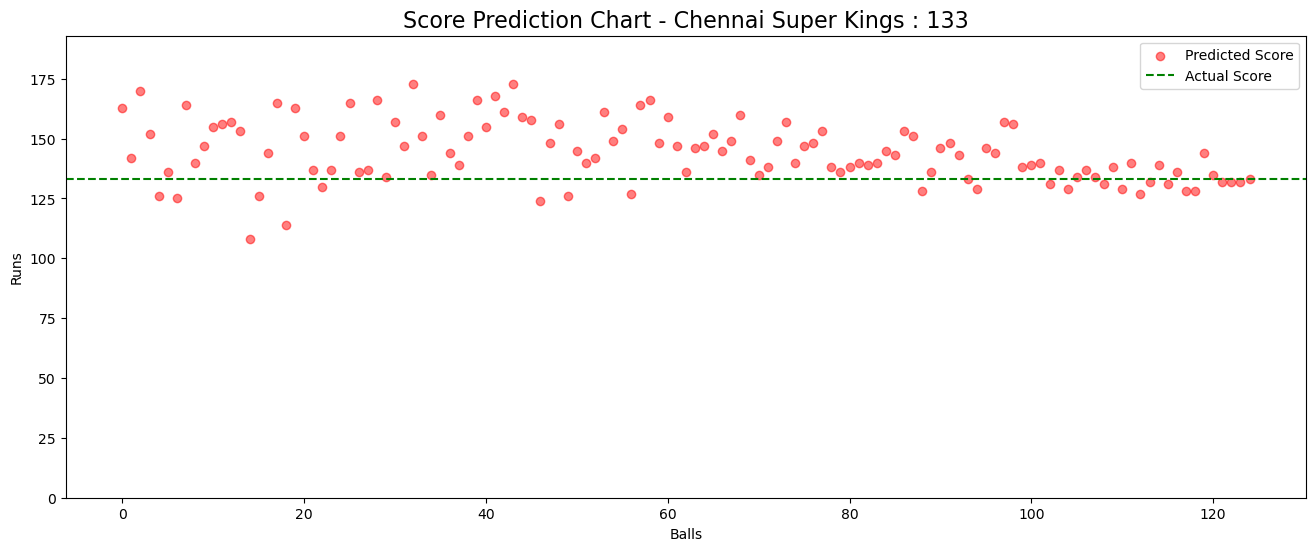

In [46]:
x_value = [i for i in range(len(rdf1))]
y_value = ing1_pred

plt.figure(figsize = (16, 6))
plt.scatter(x_value, y_value, color = 'r', alpha = 0.5, label = 'Predicted Score')
plt.axhline(actual_score1, ls = '--', label = 'Actual Score', color = 'g')
plt.ylim(0, actual_score1 + 60)
plt.legend()
plt.title('Score Prediction Chart' + ' - ' + t1 + ' : ' + str(actual_score1), fontsize = 16)
plt.xlabel('Balls')
plt.ylabel('Runs')

In [47]:
np.mean([abs(i - actual_score1) for i in (ing1_pred)])

13.312

Text(0, 0.5, 'Runs')

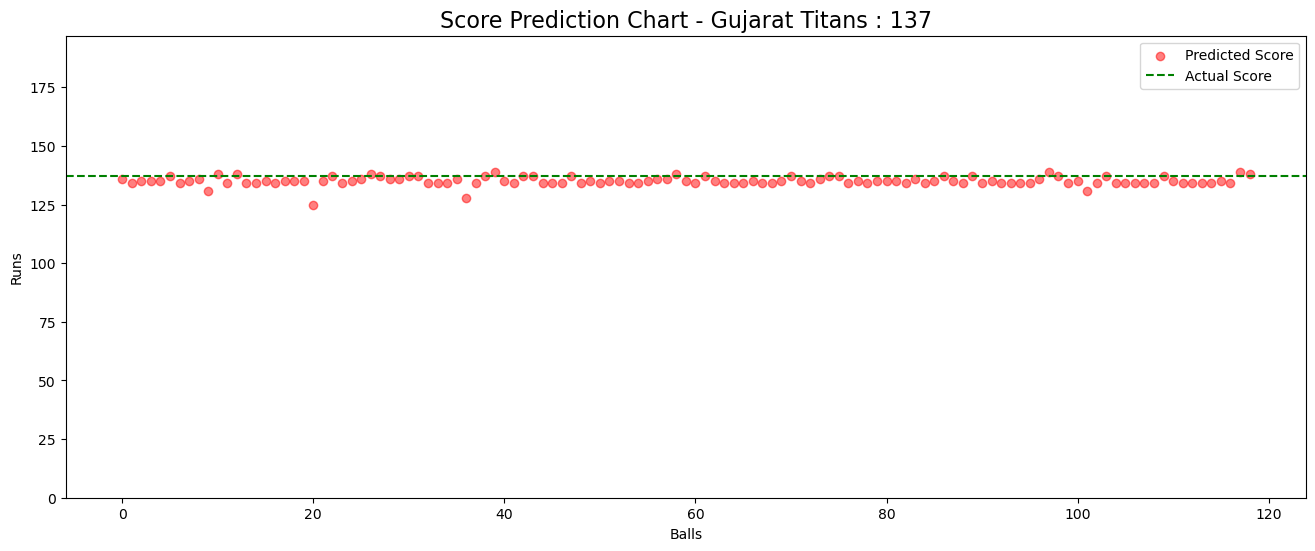

In [48]:
x_value = [i for i in range(len(rdf2))]
y_value = ing2_pred

plt.figure(figsize = (16, 6))
plt.scatter(x_value, y_value, color = 'r', alpha = 0.5, label = 'Predicted Score')
plt.axhline(actual_score2, ls = '--', label = 'Actual Score', color = 'g')
plt.ylim(0, actual_score2 + 60)
plt.legend()
plt.title('Score Prediction Chart' + ' - ' + t2 + ' : ' + str(actual_score2), fontsize = 16)
plt.xlabel('Balls')
plt.ylabel('Runs')

In [49]:
np.mean([abs(i - actual_score2) for i in (ing2_pred)])

2.176470588235294

In [50]:
win_count = 0
tie_count = 0
lose_count = 0

win_count_ls = []
tie_count_ls = []
lose_count_ls = []

ing1_curr_score = 0
ing1_curr_wks = 0
ing1_curr_overs = 0.0

for i in range(len(rdf1)):
   

        # 1st innings
        ing1_curr_score += rdf1.total_runs[i]
        ing1_curr_wks += rdf1.is_out[i]
        ing1_curr_overs += rdf1.ball[i]
        
        # 2nd innings
        ing2_curr_score = 0
        ing2_curr_wks = 0
        ing2_curr_overs = 0.0
        
        for j in range(100):
            
            ing1_prediction = innings1_runs_pred(ing1_curr_score, ing1_curr_wks, ing1_curr_overs)
            target = ing1_prediction
            
            ing2_prediction = innings2_runs_pred(ing2_curr_score, ing2_curr_wks, ing2_curr_overs, target)
            
            if ing2_prediction > target:
                win_count += 1
            elif ing2_prediction == target:
                tie_count += 1
            else:
                lose_count += 1
                
        win_count_ls.append(win_count)
        tie_count_ls.append(tie_count)
        lose_count_ls.append(lose_count)
        
        win_count = 0
        tie_count = 0
        lose_count = 0

In [51]:
win_count_ls

[65,
 100,
 100,
 60,
 69,
 71,
 83,
 90,
 96,
 98,
 98,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 99,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 99,
 100,
 100,
 99,
 99,
 99,
 100,
 100,
 96,
 99,
 100,
 99,
 99,
 98,
 100,
 99,
 100,
 96,
 99,
 98,
 99,
 99,
 97,
 97,
 99,
 97,
 99,
 95,
 99,
 96,
 97,
 95,
 92,
 94,
 97,
 97,
 90,
 92,
 89,
 87,
 92]

In [52]:
ing2_curr_score = 0
ing2_curr_wks = 0
ing2_curr_overs = 0.0

for i in range(len(rdf2)):
    
    target = actual_score1
   
    # 2nd innings
    ing2_curr_score += rdf2.total_runs[i]
    ing2_curr_wks += rdf2.is_out[i]
    ing2_curr_overs += rdf2.ball[i]

    for j in range(100):

        ing2_prediction = innings2_runs_pred(ing2_curr_score, ing2_curr_wks, ing2_curr_overs, target)

        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1

    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)

    win_count = 0
    tie_count = 0
    lose_count = 0
   

In [57]:
win_count, tie_count, lose_count

(0, 0, 0)

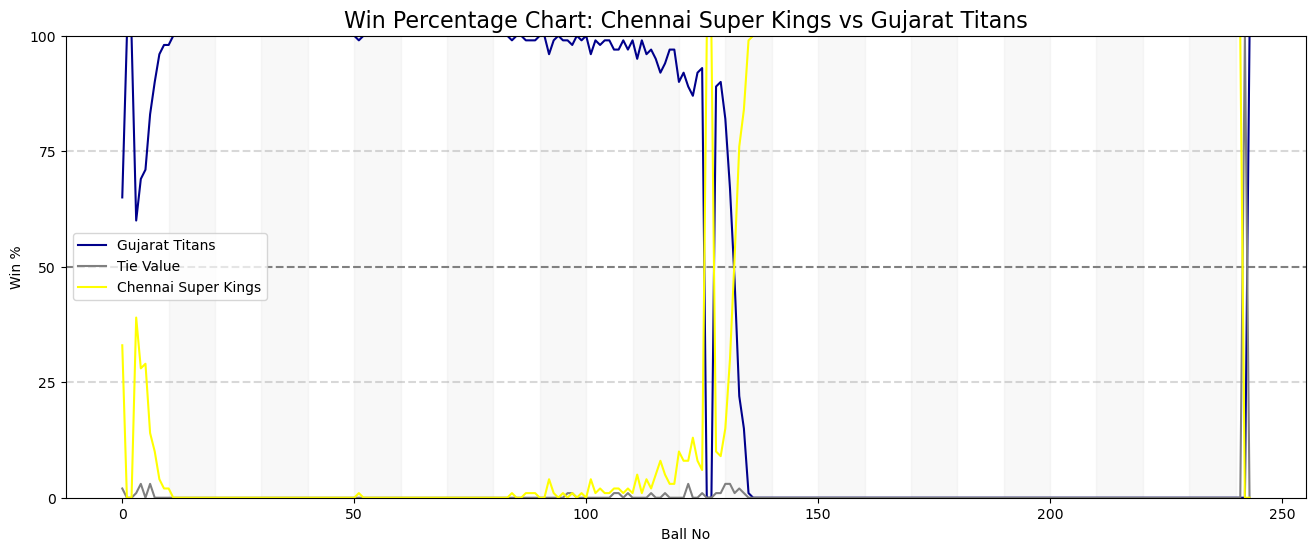

In [54]:
plt.figure(figsize = (16, 6))

x1_values = [i for i in range(len(win_count_ls))]
y1_values = win_count_ls

x2_values = [i for i in range(len(tie_count_ls))]
y2_values = tie_count_ls

x3_values = [i for i in range(len(lose_count_ls))]
y3_values = lose_count_ls

for i in range(10, len(rdf), 20):
    if i < len(rdf) - 10:
        plt.axvspan(i, i+10, ymin = 0, ymax = 100, alpha = 0.05, color='grey')
        
plt.axhline(y = 75, ls = '--', alpha = 0.3, c = 'grey')
plt.axhline(y = 50, ls = '--', alpha = 1, c = 'grey')
plt.axhline(y = 25, ls = '--', alpha = 0.3, c = 'grey')

plt.plot(x1_values, y1_values, color = 'darkblue', label = t2)
plt.plot(x2_values, y2_values, color = 'grey', label = 'Tie Value')
plt.plot(x3_values, y3_values, color = 'yellow', label = t1)

plt.ylim(0, 100)
plt.yticks([0, 25, 50, 75, 100])

plt.title('Win Percentage Chart: ' + t1 + ' vs ' + t2, fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Win %')
plt.legend()
plt.show()
